In [26]:
# MonStim_CSV_Analysis - main.py
from monstim_to_pickle import pickle_data  # noqa: F401
from Analyze_EMG import EMGData,EMGDataset

DATA_PATH = 'files_to_analyze'
OUTPUT_PATH = 'output'
SAVED_DATASETS_PATH = 'output/saved_datasets'


### Things to work on:
    # 1) More functions for dataset analysis:
        # each session should bring in and reference it's own parameters like scan rate, m/h-start/end, 
    # 2) Add function to EMGSession class: area under the curve for reflexes
    # 3) Add function to EMGSession class: frequency/power analysis for tremor, noise, or movement.
    # 4) Add a GUI for easier use.
    # 5) Create EMGExperiment class that can hold and analyze multiple datasets (across-animal analysis).
        # Each dataset will carry in its own parameters like animal ID, M/H start/end, M/H duration, M/H max, etc.
    # 6) Fix manual_mmax implementation. It's not working properly. Should be a list of floats (for each channel) instead of a single float.

In [27]:
#Process CSVs into Pickle files: 'files_to_analyze' --> 'output'
# pickle_data(DATA_PATH, OUTPUT_PATH)

# Create dictionaries of Pickle datasets and single sessions that are in the 'output' directory.
dataset_dict, datasets = EMGData.unpackPickleOutput(OUTPUT_PATH)
for idx, dataset in enumerate(datasets):
    print(f'dataset index {idx}: {dataset}')

dataset index 0: 240507 C099.2 post-dec m ramp
dataset index 1: 240508 C099.1 postdec early mcurves
dataset index 2: 240508 C099.1 postdec hreflexes
dataset index 3: 240508 C099.1 postdec mcurves1 preiso
dataset index 4: 240508 C099.1 postdec mcurves2
dataset index 5: 240508 C099.1 postdec mcurves3
dataset index 6: 240508 C099.1 predec mcurves
dataset index 7: 240516 C230.4 post-dec m-curve
dataset index 8: 240516 C230.4 post-dec m-curve long stim
dataset index 9: 240523 C230.5 post-dec sciatic mcurve long stim
dataset index 10: 240524 C230.2 post-dec sciatic mcurve std other leg


In [28]:
# Define dataset of interest for downstream analysis.
dataset_idx = 4
sessions_to_exclude = ['C030', 'C031', 'C032', 'C033', 'C034', 'C035', 'C036']

dataset_oi = EMGDataset.dataset_from_dataset_dict(dataset_dict, datasets, dataset_idx, sessions_to_exclude)

dataset_oi.dataset_parameters()

Excluding the following sessions from the dataset: ['C030', 'C031', 'C032', 'C033', 'C034', 'C035', 'C036']
EMG Sessions (3): ['C027', 'C028', 'C029'].
Date: 2024-05-08
Animal ID: C099.1
Condition: postdec mcurves2


Session Name: C028
# of Channels: 2
Scan rate (Hz): 10000
Samples/Channel: 10510
Stimulus delay (ms): 1.0
Stimulus duration (ms): 0.1
Stimulus interval (s): 3.0
EMG amp gains: [500, 500, 500, 500, 500, 500]


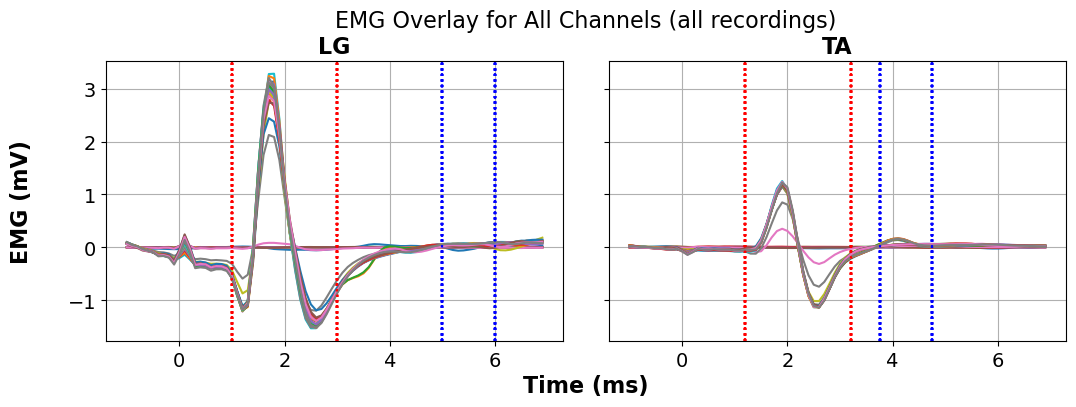

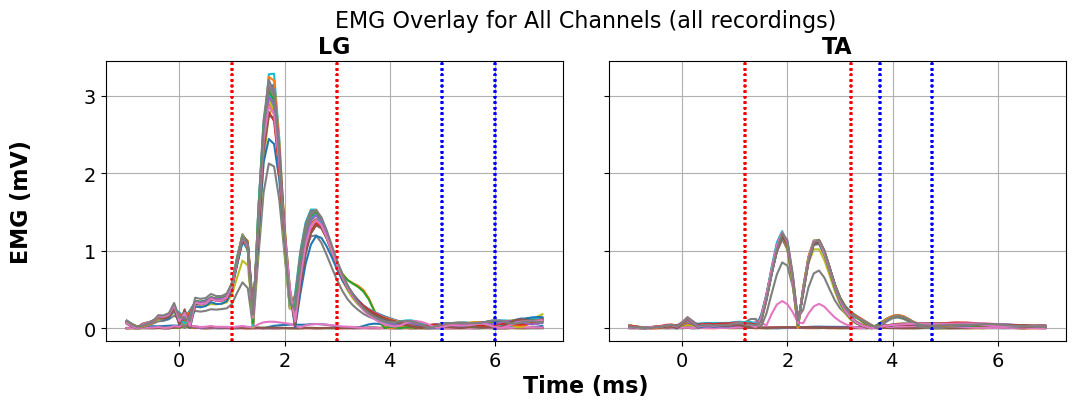

In [29]:
# Define session of interest for downstream analysis.
session_idx = 1
session_oi = dataset_oi.get_session(session_idx)

# Display session parameters.
session_oi.session_parameters()

# Set channel names for plotting.
channel_names = ["LG", "TA"]
# channel_names = ["LG"]

# Visualize single EMG session raw and filtered
session_oi.plot(plot_type = 'emg', channel_names=channel_names, m_flags=True, h_flags=True, data_type='filtered')
# session_oi.plot(plot_type = 'emg', channel_names=channel_names, m_flags=True, h_flags=True, data_type='raw')
session_oi.plot(plot_type = 'emg', channel_names=channel_names, m_flags=True, h_flags=True, data_type='rectified_filtered')
# session_oi.plot(plot_type = 'emg', channel_names=channel_names, m_flags=True, h_flags=True, data_type='rectified_raw')

In [30]:
# Use the update_window_settings method to temporarily change the reflex window settings and then replot.
# session_oi.update_window_settings()
# session_oi.plot(plot_type = 'emg', channel_names=channel_names, m_flags=True, h_flags=True, data_type='filtered')

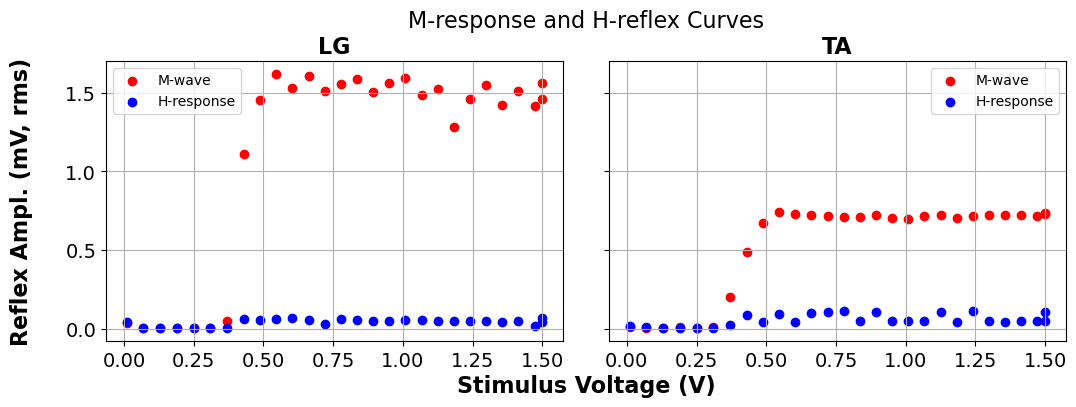

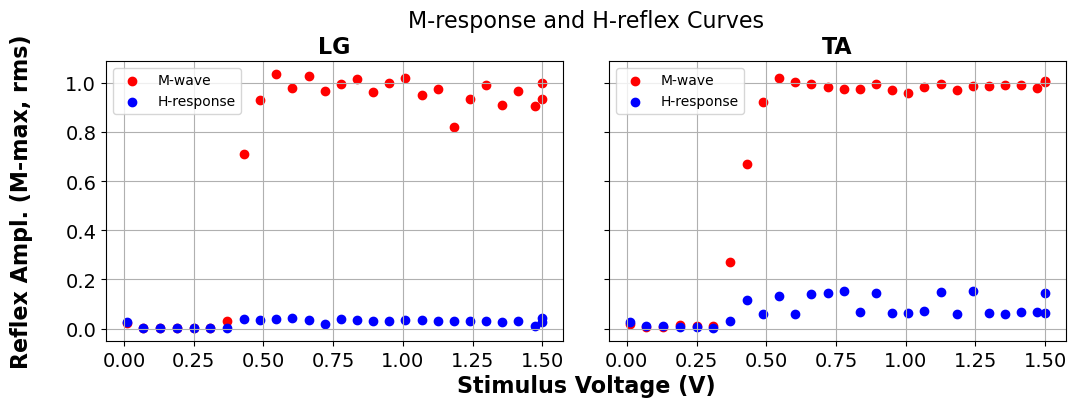

In [31]:
# Inspect reflex curves and suspected H-reflex trials with these methods.
session_oi.plot(plot_type='reflexCurves', channel_names=channel_names)
session_oi.plot(plot_type='reflexCurves', channel_names=channel_names, relative_to_mmax=True)

LG: M-max amplitude = 1.36 V
TA: M-max amplitude = 0.50 V


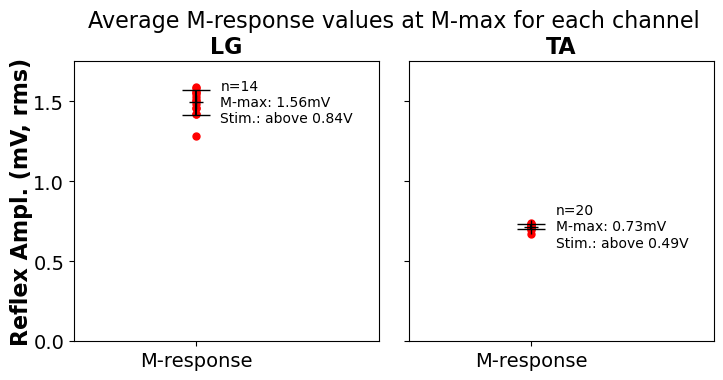

In [32]:
session_oi.m_max_report(channel_names=channel_names)
session_oi.plot(plot_type = 'mmax', channel_names=channel_names)

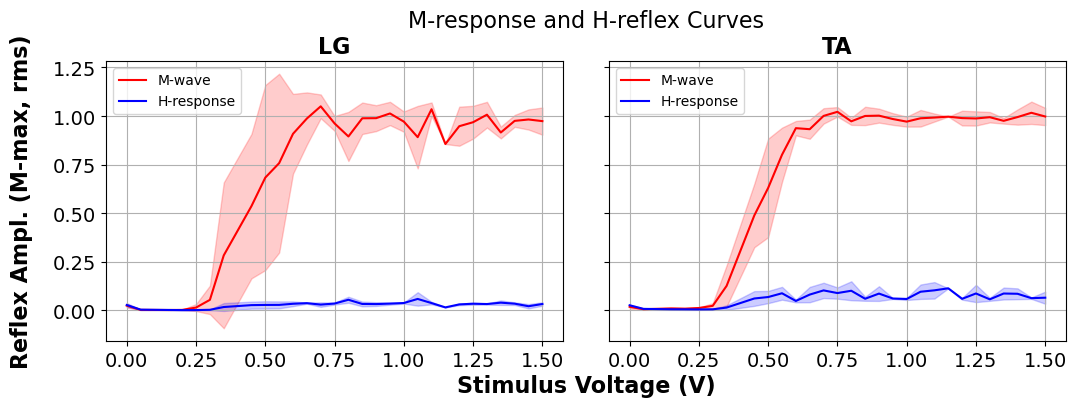

In [33]:
# Visualize the entire dataset's avereaged reflex curves with these methods of the dataset object.
dataset_oi.plot(plot_type = 'reflexCurves', channel_names=channel_names, relative_to_mmax=True)

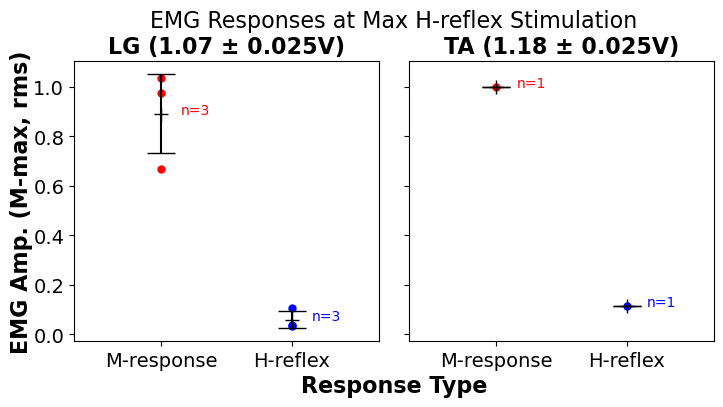

In [34]:
# Visualize the entire dataset's avereaged reflex values at H-max with this method of the dataset object.
dataset_oi.plot(plot_type = 'maxH', channel_names=channel_names, relative_to_mmax=True)